In [11]:
import numpy as np
from matplotlib import pyplot as plt
import random

In [17]:
T = 1
N = 100

r = 1
sigma = 0.5
x = 10

**1.1** **Симуляция траектории Броуновского движения**   
Для заданного приращения времени \\(\Delta t>0 \\) на интервале времени \\([0, T]\\) можно симулировать траекторию Броуновского движения, используя формулу  $$ W(\Delta t) = W(\Delta t) - W(0) \sim N(0,\Delta t)  \sim \sqrt{\Delta t}	
\cdot N(0,1). $$

**Задание** 

Using the algorithm (Section 1.4.1) simulate a path of the Wiener process.
Number of end-points of the grid including \\(T\\) is \\(N = 100\\), length of the
interval \\([0, T]\\) in time units is 1, time increment is \\(∆\\) = \\(T/N\\). Plot the
path.


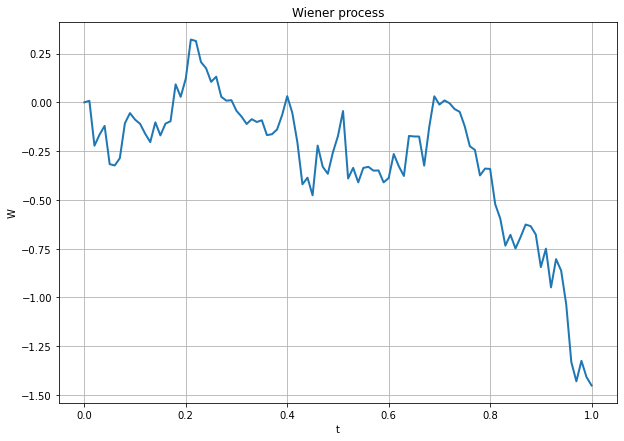

In [13]:
def f () :
  W = []
  W.append(0)
  Delta = T/N
  for i in range (1, len(X)):
    W.append(W [i-1] + np.random.normal (0, 1, 1) * np.sqrt(Delta))
  return W
  
X =[i/N for i in range(N+1)]
W = f()
plt.figure(figsize =(10, 7))
plt.grid()
plt.plot(X, W, linewidth =2.0)
plt.title('Wiener process')
plt.xlabel("t")
plt.ylabel("W")
plt.show()


**1.2**  **Броуновское движение как предел случайного блуждания**

Рассмотрим броуновское движение как предел случайного блуждания. Для последовательности одинаково распределённых случайных величин \\(X_1, X_2, ..., X_n\\), принимающих только 2 значения \\(+1\\) и \\(-1\\), расматривается частичная сумма $$ S_n = X_1+X_2+...+X_n. $$

Тогда при \\(n → ∞ \\),
$$ P\Bigg(\frac{S_{[nt]}}{\sqrt n} < x\Bigg) → P(W(t))<x, $$
где \\([x] -\\) целая часть вещественного числа \\(x \\).

**Задание** 

Using the algorithm (Section 1.4.2) simulate three paths of the Wiener
process as the limit of a random walk \\((n = 10, 100, 1000)\\). Plot the paths
in one figure, add legends.


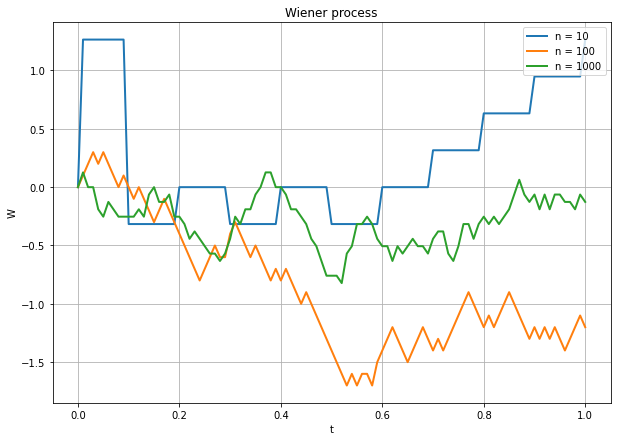

In [14]:
def runif(n):
  L = []
  for i in range (n):
    L.append(2*(random.uniform(0, 1) > 0.5) - 1)
  return L

def function(x, n):
  if x * n > 0:
    return S[int (x * n) - 1]
  else:
    return 0
    
plt.figure(figsize =(10, 7))
plt.grid()
n = [10, 100, 1000]
t = [i/N for i in range (N+1)]
for ni in n:
  S = np.cumsum(runif(ni))
  W = [function(x, ni)/np.sqrt(ni) for x in t]
  plt.plot(t, W, linewidth = 2.0)
plt.title('Wiener process')
plt.xlabel ("t")
plt.ylabel ("W")
plt.legend(['n = 10', 'n = 100', 'n = 1000'] , loc ='upper right')
plt.show()

**1.3** **Броуновское движение как \\(L^2([0,T])\\) разложение**

\\(X(t) -\\) траектория случайного процесса \\(X(t,ω)\\) для заданного ω. Траектории винеровского процесса \\(W(t)\\) принадлежат \\(L^2([0,T])\\) почти при любых значениях ω и разложение Карунена-Лоэва для него принимает вид:
$$ W(t) = W(t,ω) = \sum_{i=0}^∞Z_i(ω)\phi_i(t), 0\leq t \leq T,$$
где $$ \phi_i(t) = \frac{2\sqrt {2T}}{(2i+1)π}sin\Bigg(\frac{(2i+1)πt}{2T}\Bigg)$$ 
**Задание** 

Using the the Karhunen-Loeve expansion (Section 1.4.3) simulate three
paths of the Wiener process with \\((n = 10, 50, 100)\\) terms. Plot the paths in
one figure, add legends

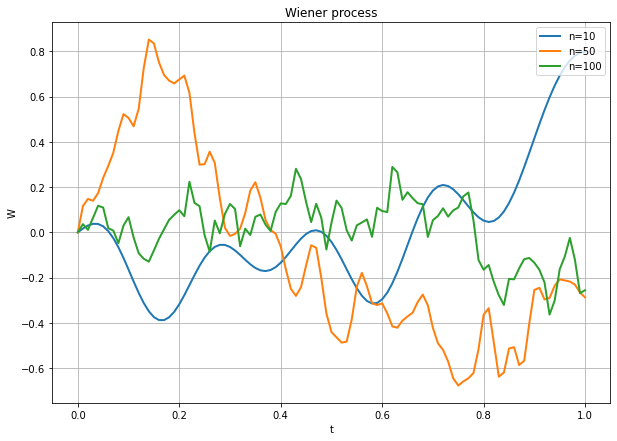

In [15]:
def phi(i, t, T) :
  return (2 * np.sqrt (2*T))/((2*i+1)*np.pi) * np.sin(((2*i + 1) * np.pi * t)/(2*T))

def sum_W (t, T) :
  Sum = 0
  for i in range(len(Z)):
    Sum += Z[i]*phi(i, t, T)
  return Sum

plt.figure(figsize = (10, 7))
plt.grid()
t = [i/N for i in range (N+1)]
n = [10, 50, 100]
for n_i in n:
  Z = np.random.normal(0, 1, n_i)
  W = []
  for i in range (N + 1):
    W +=[sum_W(t[i], T)]
  plt.plot(t, W, linewidth = 2.0)
plt.title('Wiener process')
plt.xlabel ("t")
plt.ylabel ("W")
plt.legend (['n=10', 'n=50', 'n=100'], loc = 'upper right')

In [ ]:
# def phi(i, t, T) :
#   return (2 * np.sqrt (2*T))/((2*i+1)*np.pi) * np.sin(((2*i + 1) * np.pi * t)/(2*T))
# def sum_W (t, T, n):
#   Sum = 0
#   for i in range(0, len(Z), int(N/n)):
#     Sum += Z[i]*phi(i, t, T)
#   return Sum
# plt.figure(figsize = (10, 7))
# plt.grid()
# T =1
# N = 100
# t = [i/N for i in range (N+1)]
# n = [10, 50, 100]
# Z = np.random.normal(0, 1, n[2])
# for n_i in n:
#   W = []
#   for i in range (N+1):
#     W +=[sum_W(t[i], T, n_i)]
#   plt.plot(t, W, linewidth = 2.0)
# plt.title('Wiener process')
# plt.xlabel ("t")
# plt.ylabel ("W")
# plt.legend (['n=10', 'n=50', 'n=100'], loc = 'upper right')

**1.4** **Геометрическое Броуновское движение**
$$ S(t) = x\cdot exp\Big((t - \frac{σ^2}{2})t-σW(t)\Big), t > 0$$
**Задание** 

Plot a trajectory of the geometric Brownian motion (Section 1.4.4) obtained from the simulation of the path of the Wiener process, \\(σ = 0.5\\)
(volatility), and \\(r = 1\\) (interest rate).

101


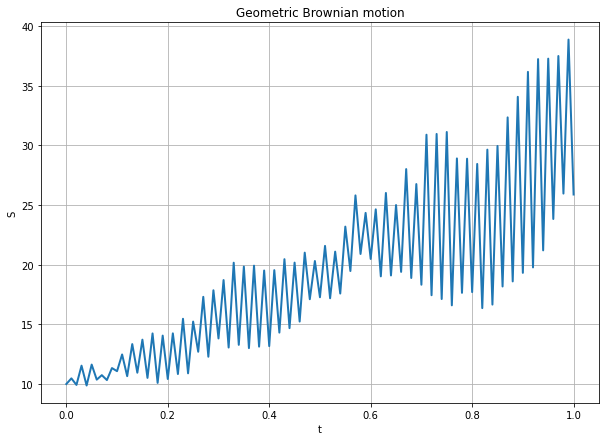

In [18]:
Delta = T / N
W = []
W.append(0)
t = list (np.linspace (0, T, N+1))
for i in range (N) :
  W.append(W[i - 1]+ np.random.normal(0, 1, 1) * np.sqrt(Delta))
print(len(W))
S = [x * np.exp((r - sigma ** 2 /2) * t[i] + sigma * W[i]) for i in range(len(W))]
plt.figure(figsize =(10, 7))
plt.grid()
plt.plot(t, S, linewidth =2.0)
plt.title ('Geometric Brownian motion')
plt.xlabel("t")
plt.ylabel("S")
plt.show()


**1.5** **Броуновский мост**

Броуновский мост — это Броуновское движение, начинающееся в точке
\\(x\\) в момент времени \\(t_0\\) и проходящее через точку \\(y\\) в момент \\(T\\). Он задаётся как 
$$ W_{{t_0},x}^{T,y}(t) =x+ W(t-t_0) -\frac{t-t_0}{T-t_0}\Big(W(T-t_0)-y+x\Big)$$
Точнее это процесс $$ \{W(t), t_0\leq t \leq T|W(t_0) = x, W(T)=y\}  $$

**Задание**

Plot a trajectory of the the Brownian bridge (Section 1.4.5) starting at \\(x\\)
at time \\(0\\) and terminating its run at \\(y = −1\\) at time \\(T\\) obtained from the
simulation of the path of the Wiener process.

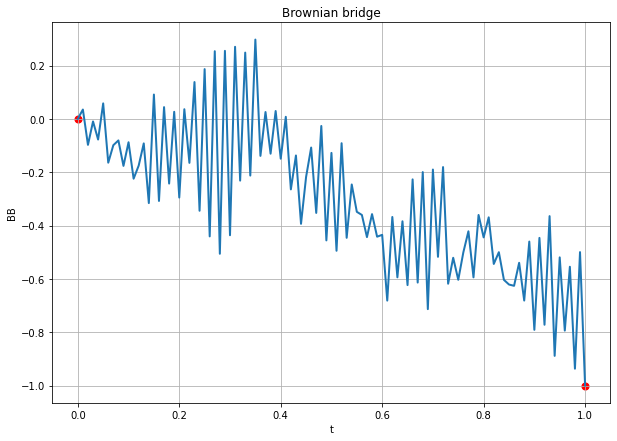

In [ ]:
def BB(x, W, t, N):
  return([x + W[i] - t[i]/T * (W[N] - y + x) for i in range(N + 1)])

Delta = T / N
W = [0]
t = list(np.linspace (0, T, N+1))
for i in range (N) :
  W +=[W[i-1]+ np.random.normal(0, 1, 1)*np.sqrt(Delta)]
x = 0
y = -1
bb = BB(x, W, t, N)
plt.figure (figsize =(10, 7) )
plt.grid()
plt.plot(t, bb , linewidth =2.0)
plt.scatter(t[0], x, color = "red", s = 50)
plt.scatter(t[len(t) - 1], y, color = "red", s = 50)
plt.title('Brownian bridge')
plt.xlabel("t")
plt.ylabel("BB")
plt.show()